In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
cc_df= pd.read_csv("../input/telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv")
cc_df.head(2)

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.3,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.4,38.33,10,96.21,610.28,Stayed,NaN,NaN


In [3]:
dd_df= pd.read_csv("../input/telecom-customer-churn-by-maven-analytics/telecom_data_dictionary.csv", encoding='latin1')
dd_df.head(3)

,Table,Field,Description
0,Customer Churn,CustomerID,A unique ID that identifies each customer
1,Customer Churn,Gender,"The customers gender: Male, Female"
2,Customer Churn,Age,"The customers current age, in years, at the t..."


In [4]:
zc_df= pd.read_csv("../input/telecom-customer-churn-by-maven-analytics/telecom_zipcode_population.csv")
zc_df.head(3)

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198


# Exploring And Analysing The Costumer Churn Dataset

In [5]:
# Handling missing values
cc_df.isnull().sum()/len(cc_df)*100

Customer ID                           0.000000
Gender                                0.000000
Age                                   0.000000
Married                               0.000000
Number of Dependents                  0.000000
City                                  0.000000
Zip Code                              0.000000
Latitude                              0.000000
Longitude                             0.000000
Number of Referrals                   0.000000
Tenure in Months                      0.000000
Offer                                 0.000000
Phone Service                         0.000000
Avg Monthly Long Distance Charges     9.683374
Multiple Lines                        9.683374
Internet Service                      0.000000
Internet Type                        21.666903
Avg Monthly GB Download              21.666903
Online Security                      21.666903
Online Backup                        21.666903
Device Protection Plan               21.666903
Premium Tech 

In [6]:
# Drop columns with high number of missing values

columns_to_drop=["Multiple Lines","Internet Type","Avg Monthly GB Download","Online Security","Online Backup","Device Protection Plan","Premium Tech Support","Streaming TV","Streaming Movies","Streaming Music","Unlimited Data","Churn Category","Churn Reason"]
cc_df=cc_df.drop(columns=columns_to_drop)
cc_df=cc_df.dropna()
cc_df.isnull().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Internet Service                     0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Charges                        0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charges          0
Total Revenue                        0
Customer Status                      0
dtype: int64

In [7]:
# Handling duplicated values
cc_df.duplicated().sum()

0

# Exploratory Data Analysis (EDA) 

In [8]:
cc_df.describe()
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6361 entries, 0 to 7041
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6361 non-null   object 
 1   Gender                             6361 non-null   object 
 2   Age                                6361 non-null   int64  
 3   Married                            6361 non-null   object 
 4   Number of Dependents               6361 non-null   int64  
 5   City                               6361 non-null   object 
 6   Zip Code                           6361 non-null   int64  
 7   Latitude                           6361 non-null   float64
 8   Longitude                          6361 non-null   float64
 9   Number of Referrals                6361 non-null   int64  
 10  Tenure in Months                   6361 non-null   int64  
 11  Offer                              6361 non-null   objec

# Univariate Analysis

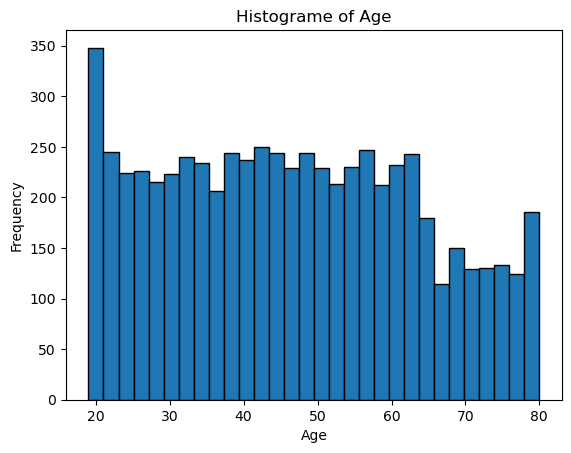

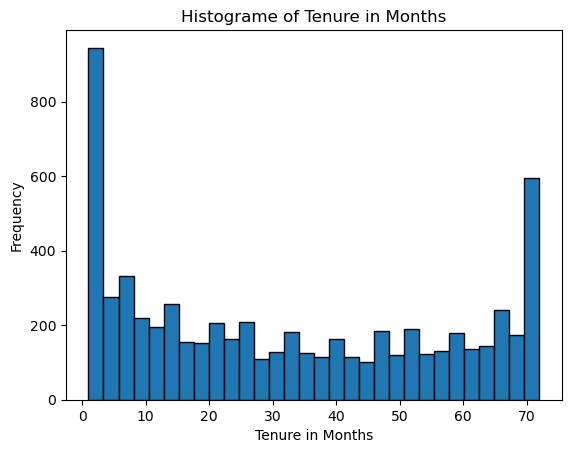

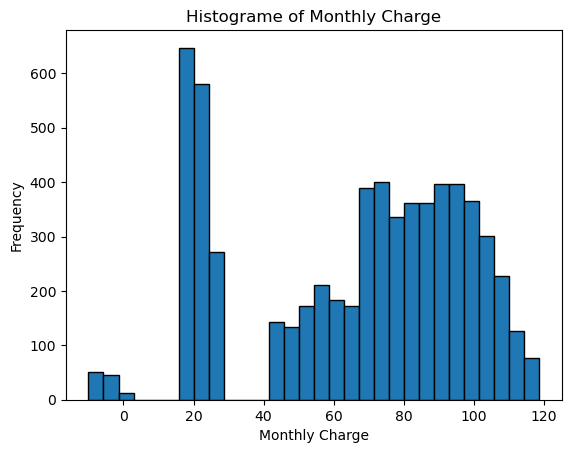

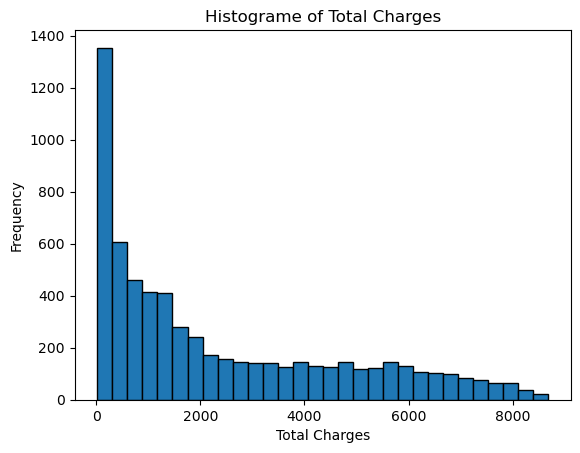

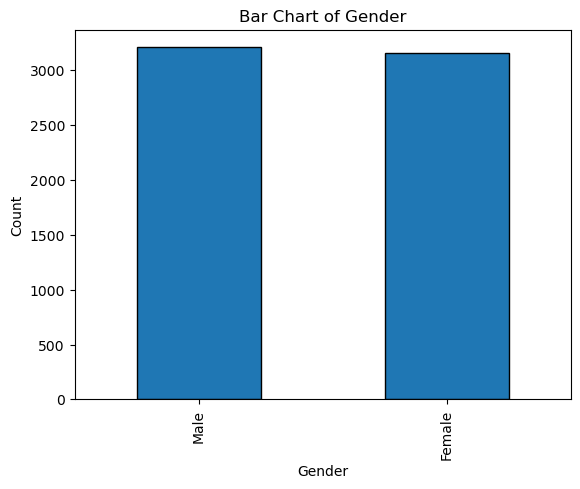

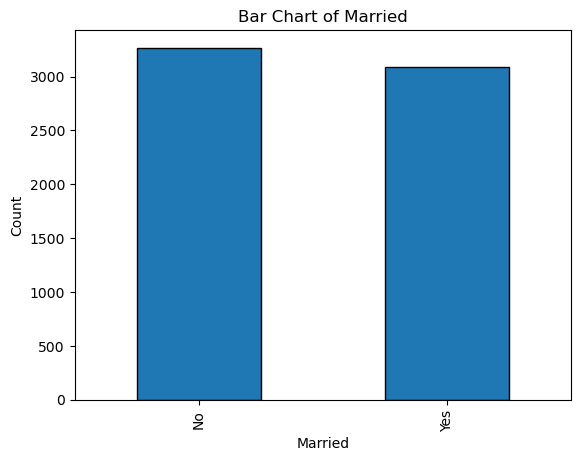

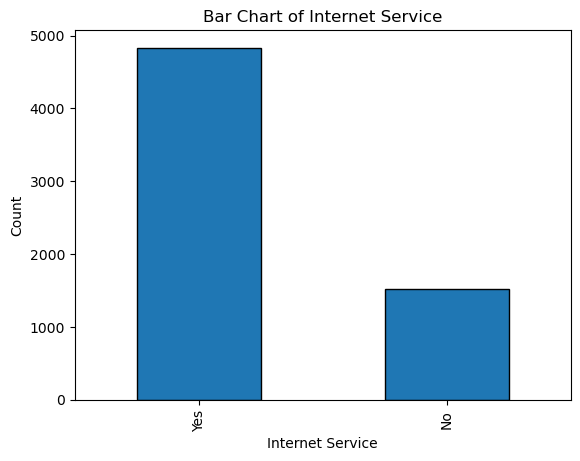

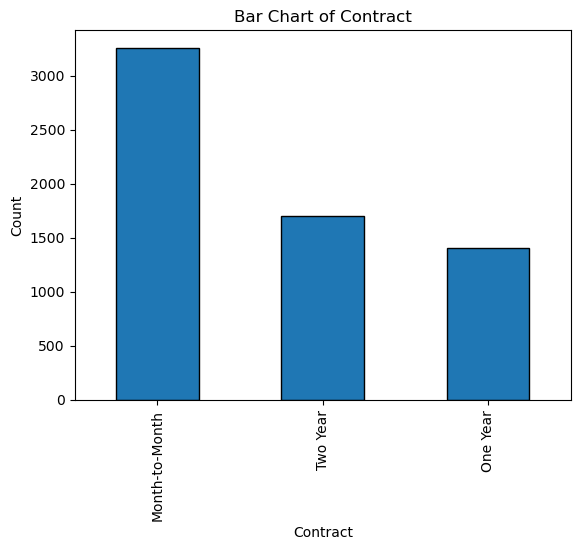

In [9]:
import matplotlib.pyplot as plt

# Numeric variables

numeric_vars=["Age","Tenure in Months", "Monthly Charge", "Total Charges"]

for var in numeric_vars:
    plt.hist(cc_df[var], bins=30,edgecolor='k')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Histograme of {var}')
    plt.show()
              
# Categorical variables
categorical_vars=["Gender", "Married", "Internet Service", "Contract"]
              
for var in categorical_vars :
    cc_df[var].value_counts().plot(kind='bar', edgecolor='k')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Bar Chart of {var}')
    plt.show()

# Bivariate Analysis

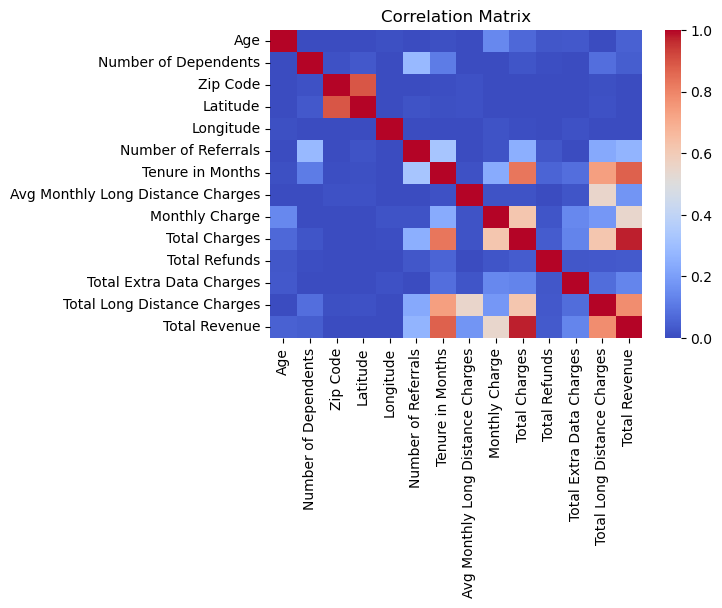

In [10]:
import seaborn as sns

plt.figure(figsize=(6,4))
# Compute the correlation matrix
corr_matrix= cc_df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=0, vmax=1 )
plt.title("Correlation Matrix")
plt.show()

# Feature engineering

In [11]:
#  Hndling missing and duplicates values in the Zip Code dataset
zc_df.isnull().sum()
zc_df.duplicated().sum()

0

In [12]:
# Adding the "City Population" column from the zip code table
cc_df=cc_df.merge(zc_df[["Zip Code", "Population"]], on= "Zip Code", how='left')
cc_df.head(3)
cc_df.columns
cc_df["Customer Status"].head(3)

0     Stayed
1     Stayed
2    Churned
Name: Customer Status, dtype: object

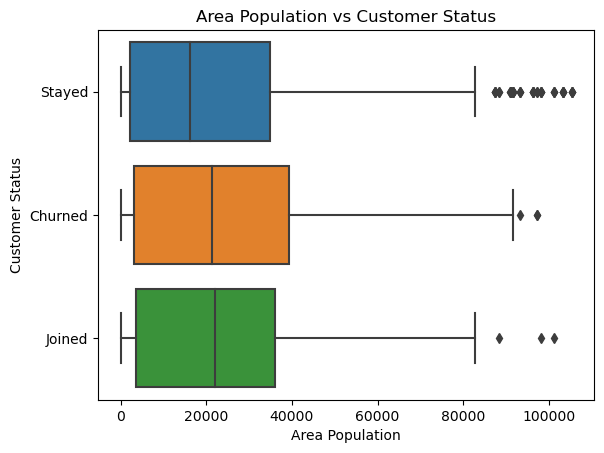

In [13]:
# Plot a box plot of city population grouped by customer status

sns.boxplot(x='Population',y='Customer Status', data=cc_df)
plt.title("Area Population vs Customer Status")
plt.xlabel("Area Population")
plt.ylabel("Customer Status")
plt.show()

In [14]:
# Calculate the average population for every status
average_population= cc_df.groupby("Customer Status")["Population"].mean()
print(average_population)

Customer Status
Churned    23826.842849
Joined     23170.949519
Stayed     21463.893547
Name: Population, dtype: float64


## The Relationship between som Categorical features and Churn

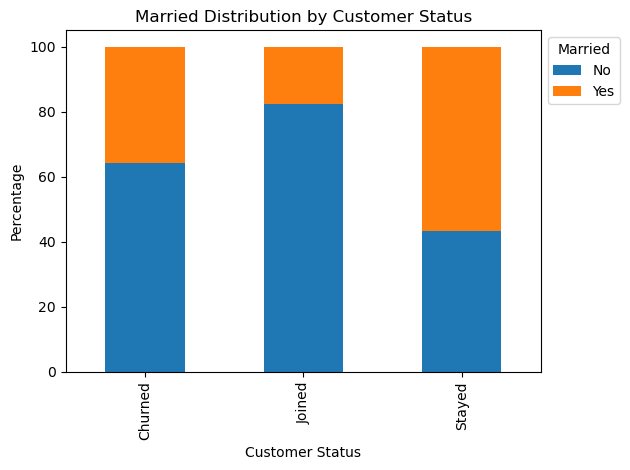

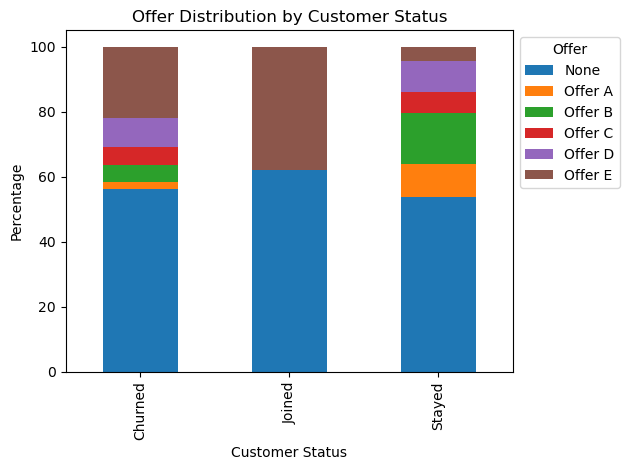

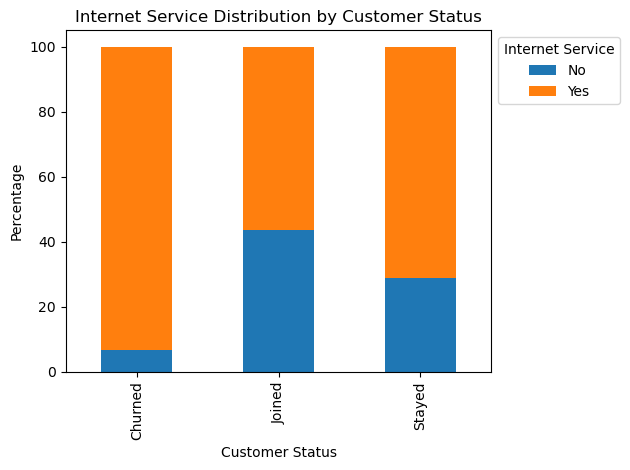

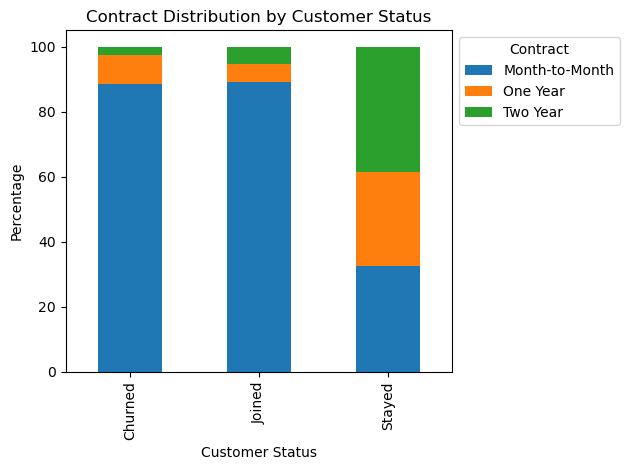

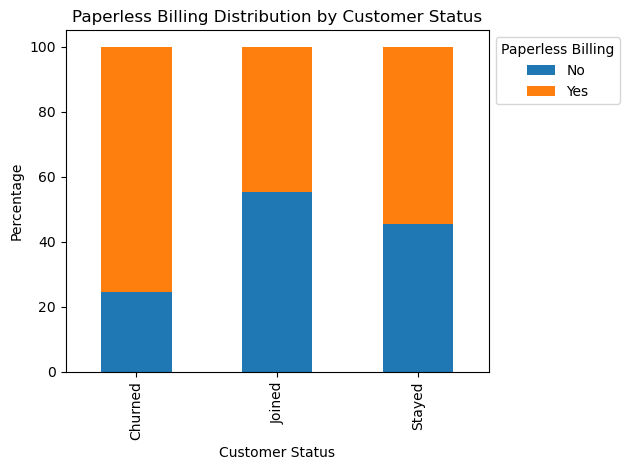

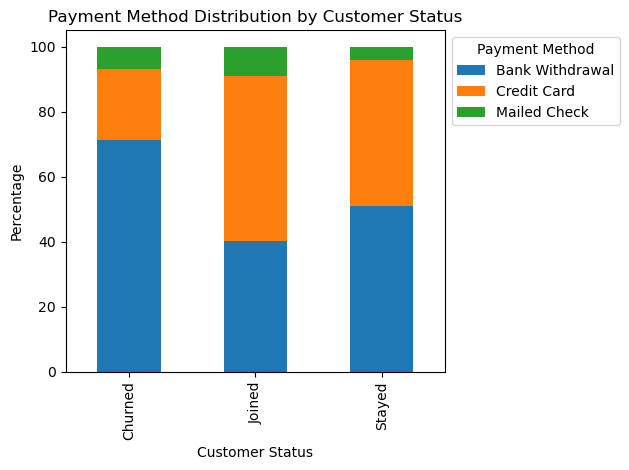

In [15]:
categorical_columns = ['Married', 'Offer',  'Internet Service', 'Contract', 
'Paperless Billing', 'Payment Method']
colors = {'Churned': 'red', 'Joined': 'green', 'Stayed': 'blue'}

for column in categorical_columns :
    grouped_data=cc_df.groupby(["Customer Status", column]).size()
    grouped_data
    percentage_data=grouped_data.unstack().apply(lambda x: x / x.sum(), axis=1) * 100
    
    # Plot the bar plot
    ax = percentage_data.plot(kind='bar', stacked=True)
    ax.set_title(f'{column} Distribution by Customer Status')
    ax.set_xlabel('Customer Status')
    ax.set_ylabel('Percentage')
    ax.legend(title=column, bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()

## The Relationship between som Numerical features and Churn

In [16]:
cc_df["Average Charges per Month"]= cc_df["Total Charges"]/cc_df["Tenure in Months"]

In [17]:
numerical_columns = ['Age', 'Number of Dependents', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 
                     'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 
                     'Total Long Distance Charges', 'Total Revenue','Average Charges per Month']

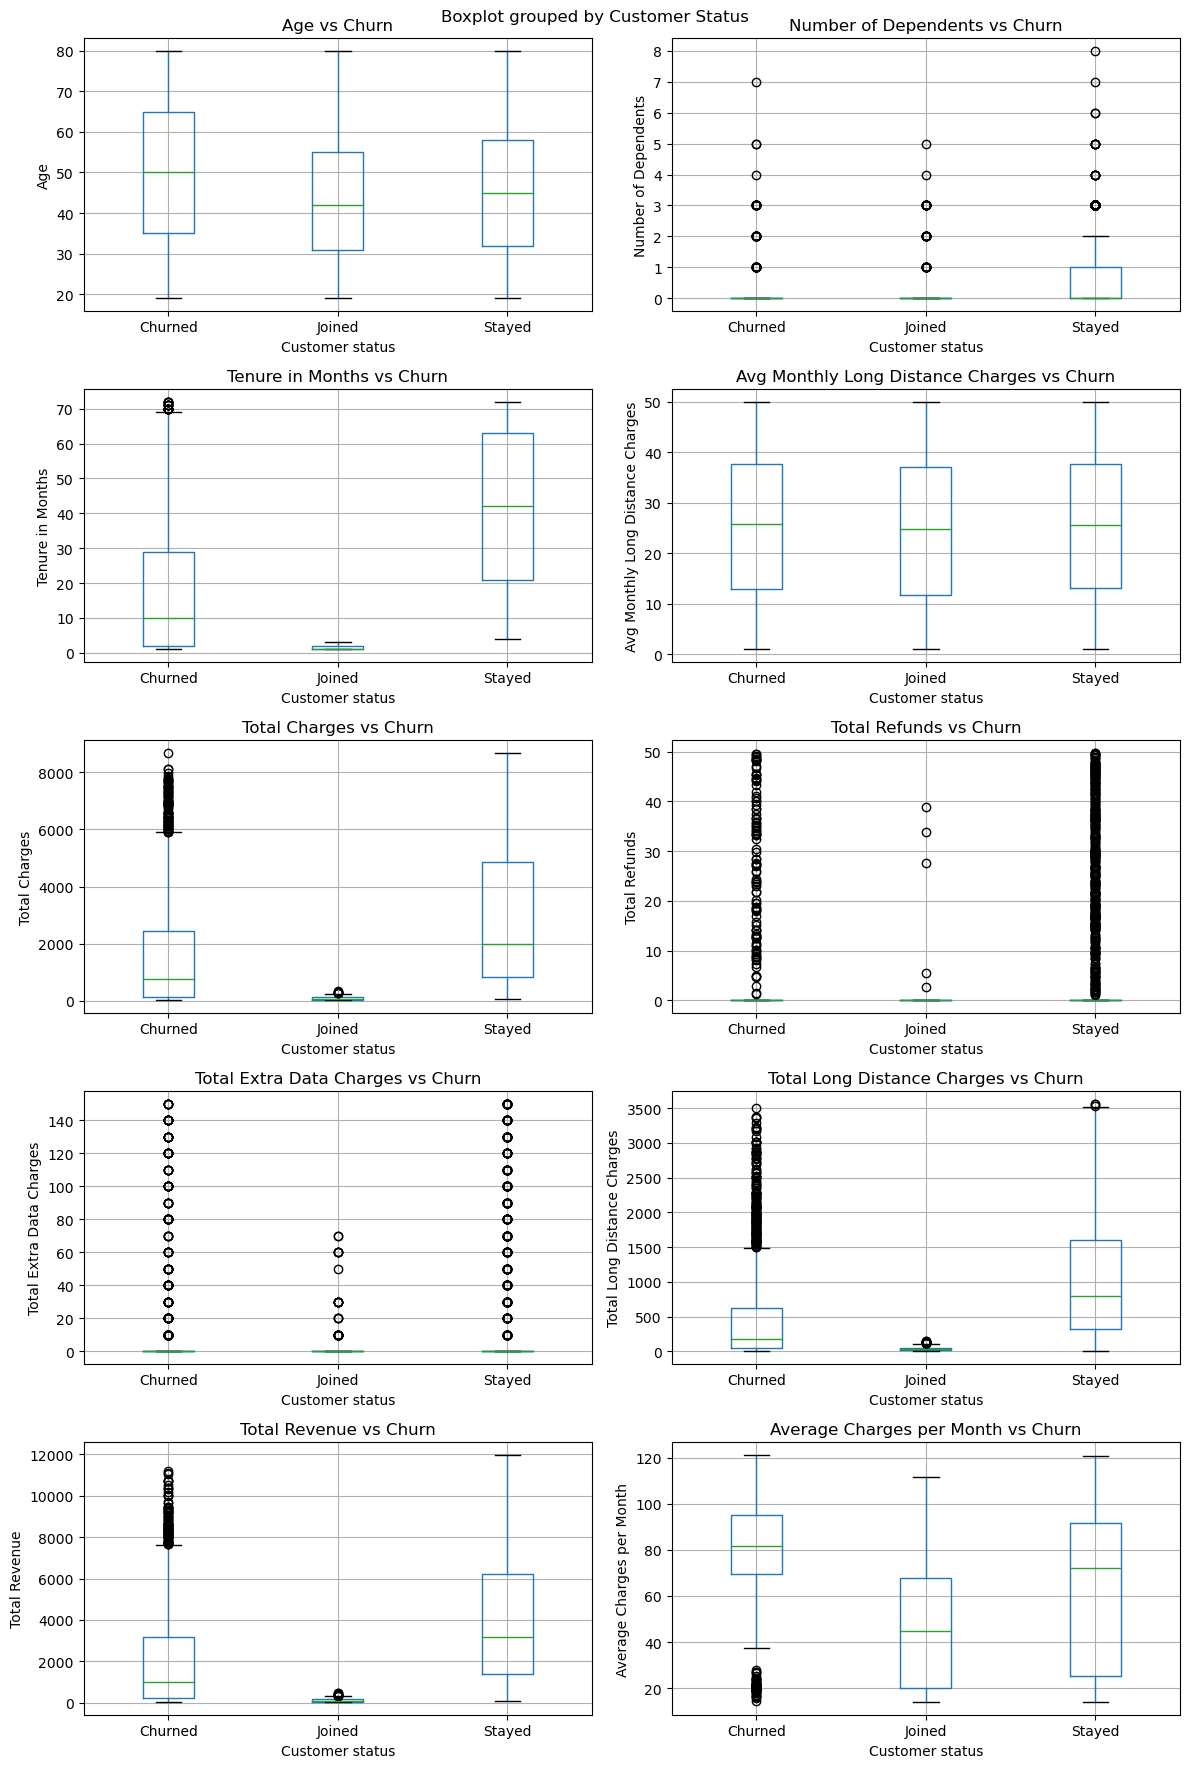

In [18]:
# Create subplots for scatter plots
fig, axes= plt.subplots(nrows=5, ncols=2, figsize=(12,18))
# Plot Scatter plot for numerical features againt churn
for i, column in enumerate(numerical_columns):
    row= i //2
    col= i%2
    ax= axes[row, col]
    cc_df.boxplot(column=column, by='Customer Status', ax=ax)
    ax.set_title(f'{column} vs Churn')
    ax.set_xlabel('Customer status')
    ax.set_ylabel(column)
    
plt.tight_layout()
plt.show()
    

    

In [19]:
from scipy.stats import ttest_ind, chi2_contingency

for column in numerical_columns:
    
    group_a= cc_df[cc_df["Customer Status"]=="Churned"][column]
    group_b= cc_df[cc_df["Customer Status"]=="Stayed"][column]
    
    t_statistic, p_value= ttest_ind(group_a, group_b)
    
    print("For: ", column)
    print("T-Statistic: ", t_statistic)
    print("P_value: ", p_value)

    
    





For:  Age
T-Statistic:  8.502617373979227
P_value:  2.3192560992036036e-17
For:  Number of Dependents
T-Statistic:  -18.913112254330642
P_value:  1.6205308322309452e-77
For:  Tenure in Months
T-Statistic:  -37.00334167186098
P_value:  6.44544194279377e-270
For:  Avg Monthly Long Distance Charges
T-Statistic:  -0.036008660414131
P_value:  0.9712766627758354
For:  Total Charges
T-Statistic:  -19.64019046389252
P_value:  2.922235931483641e-83
For:  Total Refunds
T-Statistic:  -3.043452739843676
P_value:  0.002349026748466722
For:  Total Extra Data Charges
T-Statistic:  -0.10161559604209133
P_value:  0.9190652277104736
For:  Total Long Distance Charges
T-Statistic:  -24.351966892105857
P_value:  6.165822560000573e-125
For:  Total Revenue
T-Statistic:  -22.920099295072138
P_value:  1.770862140018718e-111
For:  Average Charges per Month
T-Statistic:  15.366113782670569
P_value:  2.767442816525917e-52


In [20]:
for column in categorical_columns:
    contigency_table=pd.crosstab(cc_df[column],cc_df["Customer Status"])
    chi2, p_value, _, _ = chi2_contingency( contigency_table)
    print("For: ", column)
    print("T-Statistic: ", t_statistic)
    print("P_value: ", p_value)
    
    

For:  Married
T-Statistic:  15.366113782670569
P_value:  9.719362380361782e-84
For:  Offer
T-Statistic:  15.366113782670569
P_value:  3.691092494014556e-208
For:  Internet Service
T-Statistic:  15.366113782670569
P_value:  1.5106489604817647e-93
For:  Contract
T-Statistic:  15.366113782670569
P_value:  0.0
For:  Paperless Billing
T-Statistic:  15.366113782670569
P_value:  2.7291657796131483e-57
For:  Payment Method
T-Statistic:  15.366113782670569
P_value:  1.185544328077821e-68


## Feature Engineering

In [21]:
# Removing unecessary columns
columns_to_remove=[ 'Avg Monthly Long Distance Charges','Total Extra Data Charges']
numerical_columns= [column for column in numerical_columns if column not in columns_to_remove]
# Removing the "joined" class
cc_df=cc_df[cc_df["Customer Status"]!='Joined'].copy()
cc_df['Customer Status'].value_counts()

Stayed     4246
Churned    1699
Name: Customer Status, dtype: int64

In [22]:
# Encode Customer Status 
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
cc_df["Customer Status"]=label_encoder.fit_transform(cc_df["Customer Status"])
cc_df["Customer Status"].head(4)

0    1
1    1
2    0
3    0
Name: Customer Status, dtype: int64

In [23]:
#Dummyfying all categorical columns

cc_df_categorical= pd.get_dummies(cc_df[categorical_columns], drop_first=True)
cc_df[numerical_columns]
#cc_df_categorical['Paperless Billing_Yes']
cc_df=pd.concat([cc_df[numerical_columns], cc_df_categorical, cc_df["Customer Status"]], axis=1)
cc_df.head(3)




,Age,Number of Dependents,Tenure in Months,Total Charges,Total Refunds,Total Long Distance Charges,Total Revenue,Average Charges per Month,Married_Yes,Offer_Offer A,...,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Service_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Customer Status
0,37,0,9,593.30,0.00,381.51,974.81,65.922222,1,0,...,0,0,0,1,1,0,1,1,0,1
1,46,0,9,542.40,38.33,96.21,610.28,60.266667,0,0,...,0,0,0,1,0,0,0,1,0,1
2,50,0,4,280.85,0.00,134.60,415.45,70.212500,0,0,...,0,0,1,1,0,0,1,0,0,0


In [24]:
# Standarising Numerical Features

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

cc_df[numerical_columns]= scaler.fit_transform(cc_df[numerical_columns])
cc_df.head(3)


,Age,Number of Dependents,Tenure in Months,Total Charges,Total Refunds,Total Long Distance Charges,Total Revenue,Average Charges per Month,Married_Yes,Offer_Offer A,...,Offer_Offer C,Offer_Offer D,Offer_Offer E,Internet Service_Yes,Contract_One Year,Contract_Two Year,Paperless Billing_Yes,Payment Method_Credit Card,Payment Method_Mailed Check,Customer Status
0,-0.582609,-0.493191,-1.067317,-0.830139,-0.257352,-0.588235,-0.835798,-0.094178,1,0,...,0,0,0,1,1,0,1,1,0,1
1,-0.047780,-0.493191,-1.067317,-0.852024,4.442643,-0.921860,-0.960736,-0.280838,0,0,...,0,0,0,1,0,0,0,1,0,1
2,0.189921,-0.493191,-1.275740,-0.964480,-0.257352,-0.876967,-1.027511,0.047420,0,0,...,0,0,1,1,0,0,1,0,0,0


# Learning Machine Model (Removing Joined)

## Split, Train and Test the Data

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets

X=cc_df.drop("Customer Status", axis=1)
y=cc_df["Customer Status"]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
# Train the Model
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
y_pred_prob= model.predict_proba(X_test)[:,1]
y_pred_prob

array([0.4939765 , 0.98798137, 0.97919015, ..., 0.99945918, 0.91139731,
       0.99320296])

# Machine Learning Model Evaluation

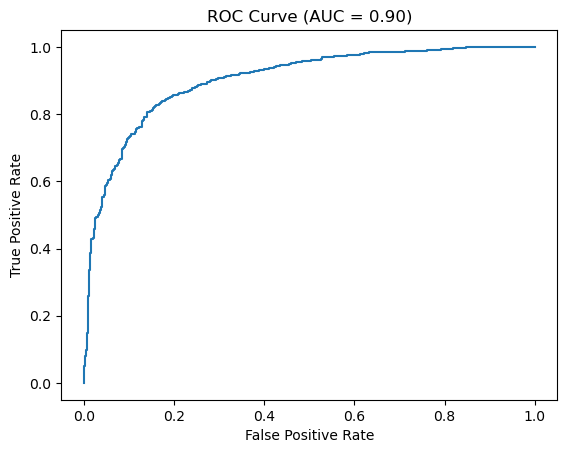

AUC 0.9022425278674903


In [27]:
# Evaluate the model
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC

fpr, tpr,tresholds = roc_curve(y_test, y_pred_prob)
auc= roc_auc_score(y_test, y_pred_prob)

# Plot Roc curve

plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (AUC = {:.2f})".format(auc))
plt.show()

print("AUC",auc)

In [28]:
# Precision, Recall and F1_score

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)

print(f"The precision is : {precision}")
print(f"The recall is : {recall}")
print(f"The f1-score is : {f1}")
print(f"The accuracy is : {accuracy}")

The precision is : 0.8893188854489165
The recall is : 0.8997650743931088
The f1-score is : 0.8945114830673415
The accuracy is : 0.8480941704035875


## Tune The Hyperparameters

In [29]:
from sklearn.model_selection import GridSearchCV


#Define the hyperparameter Grid

param_grid = {
    'C':[0.01,0.1,1,10,100],
    'penalty':['l1','l2'],
    'solver':['liblinear','saga']
}
grid_search= GridSearchCV(model, param_grid,cv=7,scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params= grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set

y_pred= best_model.predict(X_test)

precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)

print(f"The precision is : {precision}")
print(f"The recall is : {recall}")
print(f"The f1-score is : {f1}")
print(f"The accuracy is : {accuracy}")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

The precision is : 0.890527950310559
The recall is : 0.8981989036805011
The f1-score is : 0.8943469785575048
The accuracy is : 0.8480941704035875


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


the default hyperparameters were already well-suited for the given data, and further adjustments did not yield better results.

## Dealing with The Outliers By Using the Support Vector Machines (SVM) Algorithm.

In [30]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)

In [31]:
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)

print(f"The precision is : {precision}")
print(f"The recall is : {recall}")
print(f"The f1-score is : {f1}")
print(f"The accuracy is : {accuracy}")

The precision is : 0.881470367591898
The recall is : 0.9201252936570086
The f1-score is : 0.9003831417624522
The accuracy is : 0.8542600896860987


### Tuning the hyparameters for SVC

In [32]:
from sklearn.model_selection import GridSearchCV


#Define the hyperparameter Grid

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}


# Perform Grid Search

grid_search= GridSearchCV(svc, param_grid,cv=5)
grid_search.fit(X_train, y_train)

best_params= grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set

y_pred= best_model.predict(X_test)

precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)

print(f"The precision is : {precision}")
print(f"The recall is : {recall}")
print(f"The f1-score is : {f1}")
print(f"The accuracy is : {accuracy}")

The precision is : 0.8905775075987842
The recall is : 0.9177760375880971
The f1-score is : 0.9039722329348245
The accuracy is : 0.8604260089686099
